In [1]:
import pandas as pd
import zipfile
import seaborn as sns

# Join Review

In this notebook we'll briefly review [joining tables as discussed in data 8](https://www.inferentialthinking.com/chapters/08/4/Joining_Tables_by_Columns.html).

Often data is spread across two tables. Joining provides us with a way to naturally combine related tables.

Let's start by reading data from the given zip file. To showcase how to do read data that is inside zip files, we're going to use the `zipfile` module. Doing so will allow us to avoid needing to unzip the data. Running the cell below, we see that the zip file contains `elections.csv` and `presidents.csv`.

In [2]:
join_demo_filename = "lec6_join_demo_data.zip"
my_zip = zipfile.ZipFile(join_demo_filename, 'r')
list_names = [f.filename for f in my_zip.filelist]
list_names

['elections.csv', 'presidents.csv']

We could call `my_zip.extractall()` to unzip the files, but we won't. Instead, we'll read directly from the zip file itself.

In [3]:
with my_zip.open("elections.csv") as f:
    elections = pd.read_csv(f)
    
elections.head(5)

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789


In [4]:
with my_zip.open("presidents.csv") as f:
    presidents = pd.read_csv(f)
    
presidents.head(5)

,Date of birth,President,Birthplace,State of birth,In office
0,"February 22, 1732",George Washington,Westmoreland County,Virginia,"(1st) April 30, 1789 – March 4, 1797"
1,"October 30, 1735",John Adams,Braintree,Massachusetts,"(2nd) March 4, 1797 – March 4, 1801"
2,"April 13, 1743",Thomas Jefferson,Shadwell,Virginia,"(3rd) March 4, 1801 – March 4, 1809"
3,"March 16, 1751",James Madison,Port Conway,Virginia,"(4th) March 4, 1809 – March 4, 1817"
4,"April 28, 1758",James Monroe,Monroe Hall,Virginia,"(5th) March 4, 1817 – March 4, 1825"


To join tables `df` and `df2`, we call the function `df.merge(df2)`. Merge is just the word that the authors of pandas picked for joining tables. I don't know why.

Note: Unfortunately, Pandas also has a function called `df.join`. This is a limited version of `merge`. For ths sake of generality, we will only use `merge` in this class.

I can use the merge function to combine these two tables:

In [5]:
elections.merge(presidents, 
            how = "inner",
            left_on = "Candidate", right_on = "President")

,Year,Candidate,Party,Popular vote,Result,%,Date of birth,President,Birthplace,State of birth,In office
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122,"March 15, 1767",Andrew Jackson,Waxhaws Region,South/North Carolina,"(7th) March 4, 1829 – March 4, 1837"
1,1828,Andrew Jackson,Democratic,642806,win,56.203927,"March 15, 1767",Andrew Jackson,Waxhaws Region,South/North Carolina,"(7th) March 4, 1829 – March 4, 1837"
2,1832,Andrew Jackson,Democratic,702735,win,54.574789,"March 15, 1767",Andrew Jackson,Waxhaws Region,South/North Carolina,"(7th) March 4, 1829 – March 4, 1837"
3,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878,"July 11, 1767",John Quincy Adams,Braintree,Massachusetts,"(6th) March 4, 1825 – March 4, 1829"
4,1828,John Quincy Adams,National Republican,500897,loss,43.796073,"July 11, 1767",John Quincy Adams,Braintree,Massachusetts,"(6th) March 4, 1825 – March 4, 1829"
5,1836,Martin Van Buren,Democratic,763291,win,52.272472,"December 5, 1782",Martin Van Buren,Kinderhook,New York,"(8th) March 4, 1837 – March 4, 1841"
6,1840,Martin Van Buren,Democratic,1128854,loss,46.948787,"December 5, 1782",Martin Van Buren,Kinderhook,New York,"(8th) March 4, 1837 – March 4, 1841"
7,1848,Martin Van Buren,Free Soil,291501,loss,10.138474,"December 5, 1782",Martin Van Buren,Kinderhook,New York,"(8th) March 4, 1837 – March 4, 1841"
8,1836,William Henry Harrison,Whig,550816,loss,37.721543,"February 9, 1773",William Henry Harrison,Charles City County,Virginia,"(9th) March 4, 1841 – April 4, 1841"
9,1840,William Henry Harrison,Whig,1275583,win,53.051213,"February 9, 1773",William Henry Harrison,Charles City County,Virginia,"(9th) March 4, 1841 – April 4, 1841"


Notice that:
1. The output dataframe only contains rows that have names in both tables.  For example, presidents before 1824 do not appear in the joined table because there was no popular vote before 1824.
1. The name `Andrew Jackson` occurred three times in the election table and shows up three times in the output. 
1. `Grover Cleveland` occurs six times! Twice for every election he was in. This is because he appears three times in the `elections` table and twice in the `presidents` table. This results in 3 x 2 = 6 combinations.
1. Several presidents are missing because their names are not an exact match. For example, John F. Kennedy is "John Kennedy" in the elections table and "John F. Kennedy" in the presidents table.

With the caveats above in mind, tThis merged DataFrame is handy because we can use it to plot, e.g. the age of each president when they were elected.

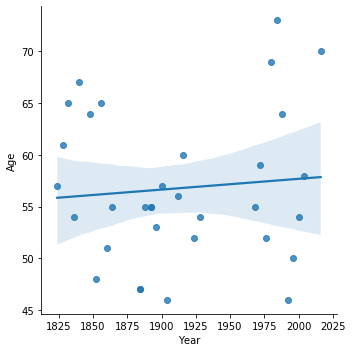

In [6]:
joined = elections.merge(presidents, 
            how = "inner",
            left_on = "Candidate", right_on = "President")

winners = joined.query("Result == 'win'").copy()
winners["Birthyear"] = winners["Date of birth"].str.split(',').str[1].map(int)
winners["Age"] = winners["Year"] - winners["Birthyear"]
sns.lmplot(data=winners, x="Year", y="Age")

### How could we fix the duplicate Grover Cleveland?

We could group by name/candidate and take only the first:

In [7]:
(
        elections.merge(presidents, 
            how = "inner",
            left_on = "Candidate", right_on = "President")
        .groupby(['Candidate', 'Year']).first().reset_index()
)

,Candidate,Year,Party,Popular vote,Result,%,Date of birth,President,Birthplace,State of birth,In office
0,Abraham Lincoln,1860,Republican,1855993,win,39.699408,"February 12, 1809",Abraham Lincoln,Sinking Spring,Kentucky,"(16th) March 4, 1861 – April 15, 1865"
1,Abraham Lincoln,1864,National Union,2211317,win,54.951512,"February 12, 1809",Abraham Lincoln,Sinking Spring,Kentucky,"(16th) March 4, 1861 – April 15, 1865"
2,Andrew Jackson,1824,Democratic-Republican,151271,loss,57.210122,"March 15, 1767",Andrew Jackson,Waxhaws Region,South/North Carolina,"(7th) March 4, 1829 – March 4, 1837"
3,Andrew Jackson,1828,Democratic,642806,win,56.203927,"March 15, 1767",Andrew Jackson,Waxhaws Region,South/North Carolina,"(7th) March 4, 1829 – March 4, 1837"
4,Andrew Jackson,1832,Democratic,702735,win,54.574789,"March 15, 1767",Andrew Jackson,Waxhaws Region,South/North Carolina,"(7th) March 4, 1829 – March 4, 1837"
5,Benjamin Harrison,1888,Republican,5443633,win,47.858041,"August 20, 1833",Benjamin Harrison,North Bend,Ohio,"(23rd) March 4, 1889 – March 4, 1893"
6,Benjamin Harrison,1892,Republican,5176108,loss,42.984101,"August 20, 1833",Benjamin Harrison,North Bend,Ohio,"(23rd) March 4, 1889 – March 4, 1893"
7,Bill Clinton,1992,Democratic,44909806,win,43.118485,"August 19, 1946",Bill Clinton,Hope,Arkansas,"(42nd) January 20, 1993 – January 20, 2001"
8,Bill Clinton,1996,Democratic,47400125,win,49.296938,"August 19, 1946",Bill Clinton,Hope,Arkansas,"(42nd) January 20, 1993 – January 20, 2001"
9,Calvin Coolidge,1924,Republican,15723789,win,54.329113,"July 4, 1872",Calvin Coolidge,Plymouth,Vermont,"(30th) August 2, 1923 – March 4, 1929"


### Right Join

The above join was an inner join.  What if we wanted to keep all of the presidents and leave missing data for years when there was no popular vote? In this case we'd do a "right" join, where we make sure to include EVERY row from our right dataframe, in this case `presidents`.

In [8]:
elections.merge(presidents, 
            how = "right",
            left_on = "Candidate", right_on = "President")

,Year,Candidate,Party,Popular vote,Result,%,Date of birth,President,Birthplace,State of birth,In office
0,1824.0,Andrew Jackson,Democratic-Republican,151271.0,loss,57.210122,"March 15, 1767",Andrew Jackson,Waxhaws Region,South/North Carolina,"(7th) March 4, 1829 – March 4, 1837"
1,1828.0,Andrew Jackson,Democratic,642806.0,win,56.203927,"March 15, 1767",Andrew Jackson,Waxhaws Region,South/North Carolina,"(7th) March 4, 1829 – March 4, 1837"
2,1832.0,Andrew Jackson,Democratic,702735.0,win,54.574789,"March 15, 1767",Andrew Jackson,Waxhaws Region,South/North Carolina,"(7th) March 4, 1829 – March 4, 1837"
3,1824.0,John Quincy Adams,Democratic-Republican,113142.0,win,42.789878,"July 11, 1767",John Quincy Adams,Braintree,Massachusetts,"(6th) March 4, 1825 – March 4, 1829"
4,1828.0,John Quincy Adams,National Republican,500897.0,loss,43.796073,"July 11, 1767",John Quincy Adams,Braintree,Massachusetts,"(6th) March 4, 1825 – March 4, 1829"
...,...,...,...,...,...,...,...,...,...,...,...
63,NaN,NaN,NaN,NaN,NaN,NaN,"May 8, 1884",Harry S. Truman,Lamar,Missouri,"(33rd) April 12, 1945 – January 20, 1953"
64,NaN,NaN,NaN,NaN,NaN,NaN,"October 14, 1890",Dwight D. Eisenhower,Denison,Texas,"(34th) January 20, 1953 – January 20, 1961"
65,NaN,NaN,NaN,NaN,NaN,NaN,"August 27, 1908",Lyndon B. Johnson,Stonewall,Texas,"(36th) November 22, 1963 – January 20, 1969"
66,NaN,NaN,NaN,NaN,NaN,NaN,"May 29, 1917",John F. Kennedy,Brookline,Massachusetts,"(35th) January 20, 1961 – November 22, 1963"


Similarly, if we also want to include candidates not in the presidents table (e.g. because they had never won), we can use a "left" join.

In [9]:
elections.merge(presidents, 
            how = "left",
            left_on = "Candidate", right_on = "President")

,Year,Candidate,Party,Popular vote,Result,%,Date of birth,President,Birthplace,State of birth,In office
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122,"March 15, 1767",Andrew Jackson,Waxhaws Region,South/North Carolina,"(7th) March 4, 1829 – March 4, 1837"
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878,"July 11, 1767",John Quincy Adams,Braintree,Massachusetts,"(6th) March 4, 1825 – March 4, 1829"
2,1828,Andrew Jackson,Democratic,642806,win,56.203927,"March 15, 1767",Andrew Jackson,Waxhaws Region,South/North Carolina,"(7th) March 4, 1829 – March 4, 1837"
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073,"July 11, 1767",John Quincy Adams,Braintree,Massachusetts,"(6th) March 4, 1825 – March 4, 1829"
4,1832,Andrew Jackson,Democratic,702735,win,54.574789,"March 15, 1767",Andrew Jackson,Waxhaws Region,South/North Carolina,"(7th) March 4, 1829 – March 4, 1837"
...,...,...,...,...,...,...,...,...,...,...,...
176,2016,Donald Trump,Republican,62984828,win,46.407862,"June 14, 1946",Donald Trump,Queens,New York,"(45th) January 20, 2017 – Incumbent"
177,2016,Evan McMullin,Independent,732273,loss,0.539546,NaN,NaN,NaN,NaN,NaN
178,2016,Gary Johnson,Libertarian,4489235,loss,3.307714,NaN,NaN,NaN,NaN,NaN
179,2016,Hillary Clinton,Democratic,65853514,loss,48.521539,NaN,NaN,NaN,NaN,NaN


If we wanted to keep both, we can instead do an "outer join".

In [10]:
elections.merge(presidents, 
            how = "outer",
            left_on = "Candidate", right_on = "President")

,Year,Candidate,Party,Popular vote,Result,%,Date of birth,President,Birthplace,State of birth,In office
0,1824.0,Andrew Jackson,Democratic-Republican,151271.0,loss,57.210122,"March 15, 1767",Andrew Jackson,Waxhaws Region,South/North Carolina,"(7th) March 4, 1829 – March 4, 1837"
1,1828.0,Andrew Jackson,Democratic,642806.0,win,56.203927,"March 15, 1767",Andrew Jackson,Waxhaws Region,South/North Carolina,"(7th) March 4, 1829 – March 4, 1837"
2,1832.0,Andrew Jackson,Democratic,702735.0,win,54.574789,"March 15, 1767",Andrew Jackson,Waxhaws Region,South/North Carolina,"(7th) March 4, 1829 – March 4, 1837"
3,1824.0,John Quincy Adams,Democratic-Republican,113142.0,win,42.789878,"July 11, 1767",John Quincy Adams,Braintree,Massachusetts,"(6th) March 4, 1825 – March 4, 1829"
4,1828.0,John Quincy Adams,National Republican,500897.0,loss,43.796073,"July 11, 1767",John Quincy Adams,Braintree,Massachusetts,"(6th) March 4, 1825 – March 4, 1829"
...,...,...,...,...,...,...,...,...,...,...,...
196,NaN,NaN,NaN,NaN,NaN,NaN,"May 8, 1884",Harry S. Truman,Lamar,Missouri,"(33rd) April 12, 1945 – January 20, 1953"
197,NaN,NaN,NaN,NaN,NaN,NaN,"October 14, 1890",Dwight D. Eisenhower,Denison,Texas,"(34th) January 20, 1953 – January 20, 1961"
198,NaN,NaN,NaN,NaN,NaN,NaN,"August 27, 1908",Lyndon B. Johnson,Stonewall,Texas,"(36th) November 22, 1963 – January 20, 1969"
199,NaN,NaN,NaN,NaN,NaN,NaN,"May 29, 1917",John F. Kennedy,Brookline,Massachusetts,"(35th) January 20, 1961 – November 22, 1963"
